In [1]:
import os, glob, cv2, math, csv, tqdm, random, keras
import numpy as np
from PIL import Image
from keras.utils.training_utils import multi_gpu_model
from keras import backend as k
from keras import applications, optimizers, losses, layers
from keras.utils.training_utils import multi_gpu_model
from keras import layers ,losses
from keras.layers import Dropout, Input, Flatten, Dense, GlobalAveragePooling2D, Activation, LSTM, SeparableConv2D, TimeDistributed, GRU
from keras.models import Sequential, Model, load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers.convolutional import Conv2D
%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
model_gen = load_model('../Opticalflow/20190527_mobflow_00000001.h5')

In [110]:
img1 = cv2.resize(np.array(Image.open('../data/endos/image/022.tif'))[100:-100, 100:-100],(512,384))
img2 = cv2.resize(np.array(Image.open('../data/endos/image/023.tif'))[100:-100, 100:-100],(512,384))

In [111]:
img_test = np.reshape(np.concatenate((img1,img2), axis= 2),(1,384,512,6))

In [112]:
img_test.shape

(1, 384, 512, 6)

In [113]:
img_predict = model_gen.predict(img_test)

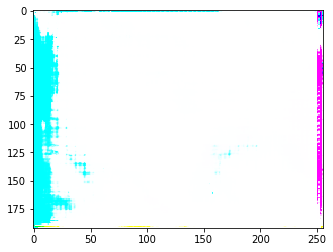

In [114]:
plt.imshow(img_predict[-1][0])

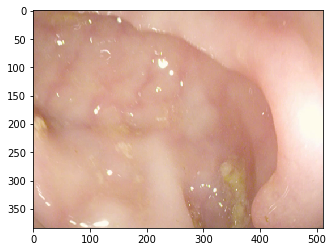

In [115]:
plt.imshow(img1)

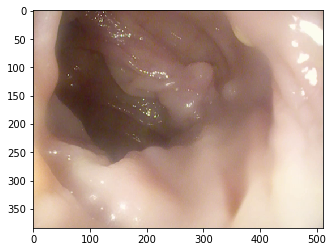

In [116]:
plt.imshow(img2)

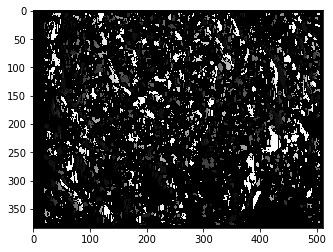

In [117]:
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=11)
disparity = stereo.compute(cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY),cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY))
plt.imshow(disparity,'gray')
plt.show()